In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import *
import pandas as pd

plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["font.size"] = 20
plt.style.use(["dark_background"])

# plt.rcParams.keys()

# Importing the data

In [3]:
samples = pd.read_csv("samples.csv", delimiter=",")
train_data = pd.read_csv("train_ts.csv", delimiter=",")
theta = samples.to_numpy()
X = train_data.to_numpy()

$\mathbf{X}$ is the training data $(9999, 201)$ and $\mathbf{\theta}$ is the targets $(9999,15)$.
Our goal is to find the parameters $\mathbf{W}$, a $(15, 201)$ matrix such that the $l_2$-norm is minimized.\
Let's try with least-squares-method for the following equation:
$$\mathbf{\theta W} = \mathbf{X}$$
We get \
$$
\mathbf{W} = (\mathbf{\theta^\dagger \theta})^{-1} \mathbf{\theta^\dagger X}$$

## Exploring the data

In [4]:
alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r = theta.T

(Text(0, 0.5, 'uniform sample range'), Text(0.5, 0, 'sample size'))

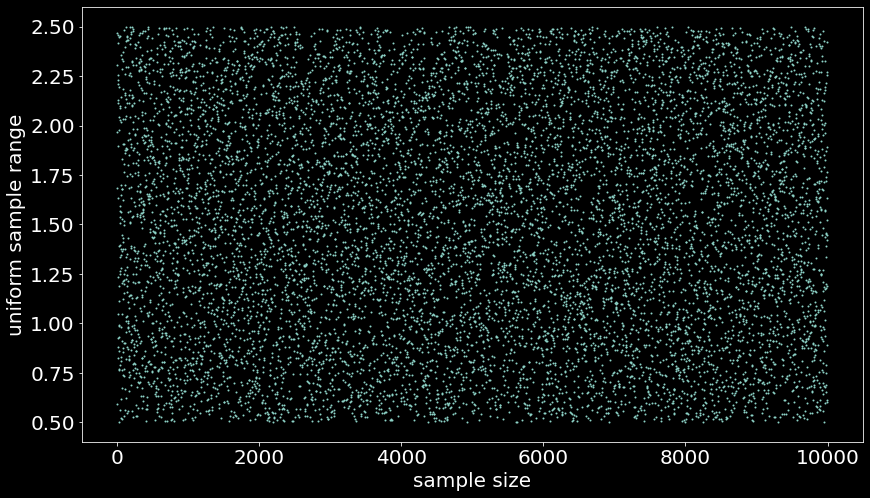

In [5]:
plt.plot(gamma_a, "o", ms=1)
plt.ylabel("uniform sample range"), plt.xlabel("sample size")

## Results from different runs

(Text(0.5, 0, 'time steps'), Text(0, 0.5, 'quantity of the protein'))

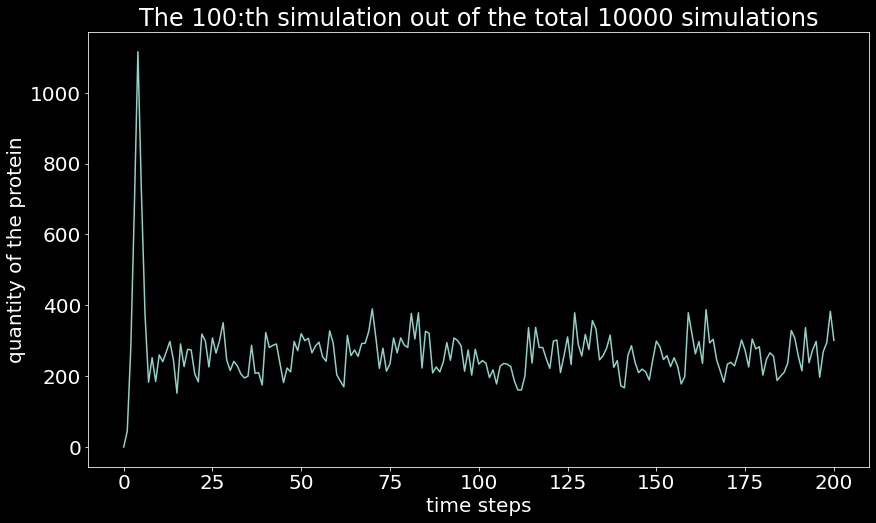

In [23]:
i = 100
plt.plot(X[i])
plt.title(f"The {i}:th simulation out of the total 10000 simulations")
plt.xlabel("time steps"), plt.ylabel("quantity of the protein")

In [7]:
print("condition number:", cond(theta.T @ theta).round(-5)) 

condition number: 9900000.0


### WARNING: 
condition number is high, maybe use QR-factorization

# Solving for the parameters

In [8]:
W = inv(theta.T @ theta) @ theta.T @ X
W.shape

(15, 201)

## plotting the value dependencies of each parameter

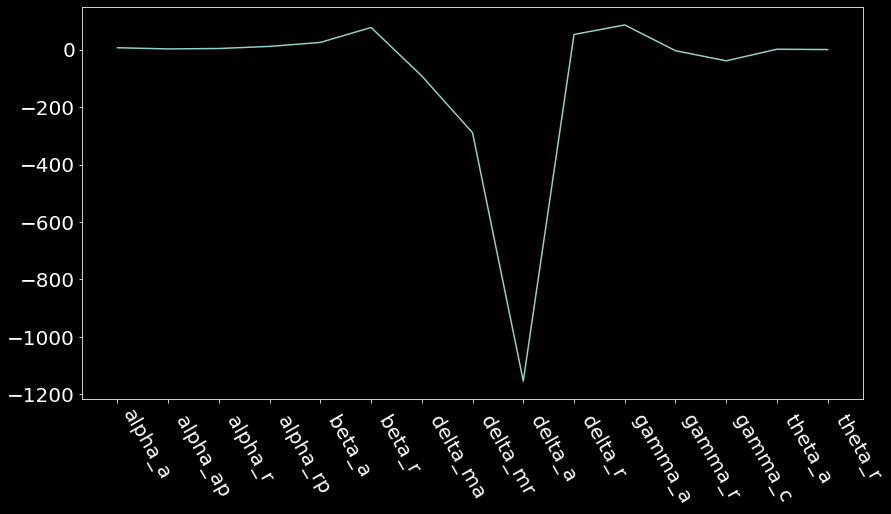

In [9]:
labels = "alpha_a, alpha_ap, alpha_r, alpha_rp, beta_a, beta_r, delta_ma, delta_mr, delta_a, delta_r, gamma_a, gamma_r, gamma_c, theta_a, theta_r"
parameter_labels = [word for word in labels.split(sep=",")]

fig, ax = plt.subplots(figsize=(14, 8))

j = 10 # choose between 0 - 14
ax.plot(parameter_labels, W[:,j]) 
fig.autofmt_xdate(rotation=-60, ha="left")

## plotting the time evolution of each parameter

(Text(0.5, 0, 'time steps'), Text(0, 0.5, 'magnitue of $W$'))

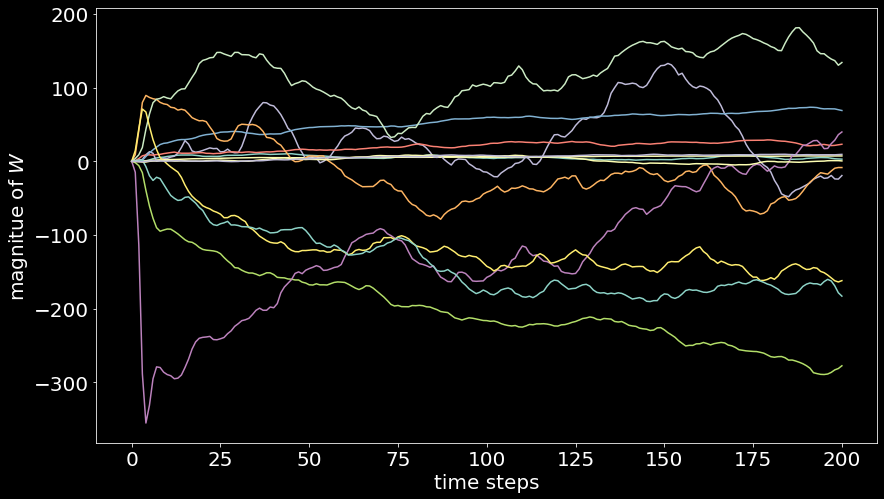

In [16]:
# choose an integer between 0 - 14
[plt.plot(W[i,:], label=f"{parameter_labels[i]}, {i}") 
 for i in [0,1,2,3,4,5,6,7,10,11,12,13,14]
] 

# for line in [7,  75, 137]:
#     plt.axvline(x=line, color="white")
# plt.legend()
plt.xlabel("time steps"), plt.ylabel("magnitue of $W$")

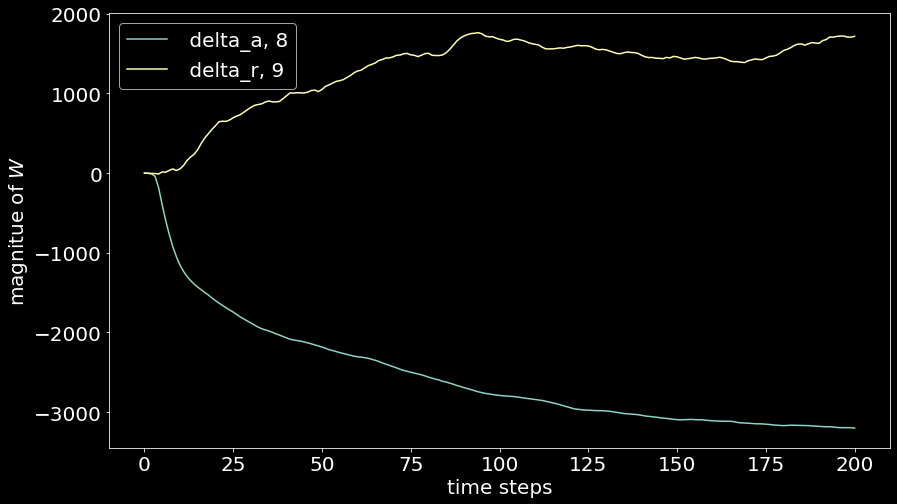

In [17]:
[plt.plot(W[i,:], label=f"{parameter_labels[i]}, {i}") 
 for i in [8,9]
] 
plt.legend()
plt.xlabel("time steps"), plt.ylabel("magnitue of $W$");